In [13]:
#import torch modules
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch import optim as optim
import torch.nn.functional as F
import torchmetrics
# import for visualization
from matplotlib import pyplot as plt
import math
from tqdm import tqdm
import numpy as np
# import biotorch modules
from biotorch.layers import fa, dfa, usf, brsf, frsf

In [14]:
# loading the dataset
training_parameters = {
    "img_size": 28,
    "n_epochs": 15,
    "batch_size": 64,
    "learning_rate": 0.002,
}
# define a transform to 1) scale the images and 2) convert them into tensors
transform = transforms.Compose([
    transforms.Resize(training_parameters['img_size']), # scales the smaller edge of the image to have this size
    transforms.ToTensor(),
])

# load the dataset
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(
        './data', # specifies the directory to download the datafiles to, relative to the location of the notebook.
        train = True,
        download = True,
        transform = transform),
    batch_size = training_parameters["batch_size"],
    shuffle=True
    )

test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('./data', train = False, download= True, transform = transform), batch_size = training_parameters["batch_size"], shuffle = True)

# Fashion MNIST has 10 classes, just like MNIST. Here's what they correspond to:
label_descriptions = {
      0: 'T-shirt/top',
      1	: 'Trouser',
      2	: 'Pullover',
      3	: 'Dress',
      4	: 'Coat',
      5	: 'Sandal',
      6	: 'Shirt',
      7	: 'Sneaker',
      8	: 'Bag',
      9	: 'Ankle boot'
}


import torch.nn.functional as F
from biotorch.layers.usf import Conv2d, Linear
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #self.conv1 = Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.layer1 = Linear(in_features=256, out_features=64)
        self.layer2 = Linear(in_features=64, out_features=16)
        self.layer3 = Linear(in_features=16, out_features=2)
        self.layer4 = Linear(in_features=2, out_features=64)
        self.layer5 = Linear(in_features=64, out_features=256)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        return x
    
model = Model()

In [15]:
class BPClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(BPClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x, labels=None): # labels to be used in 5.4.
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    
class faClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(faClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            fa.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            fa.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = fa.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = fa.Linear(in_features=600, out_features=120)
        self.fc3 = fa.Linear(in_features=120, out_features=10)

    def forward(self, x, labels=None): # labels to be used in 5.4.
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    
class usfClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(usfClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            usf.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            usf.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = usf.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = usf.Linear(in_features=600, out_features=120)
        self.fc3 = usf.Linear(in_features=120, out_features=10)

    def forward(self, x, labels=None): # labels to be used in 5.4.
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

class brsfClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(brsfClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            brsf.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            brsf.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = brsf.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = brsf.Linear(in_features=600, out_features=120)
        self.fc3 = brsf.Linear(in_features=120, out_features=10)

    def forward(self, x, labels=None): # labels to be used in 5.4.
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
    
class frsfClassifier(nn.Module):
    def __init__(self, input_dim, output_dim=1, num_labels=None):
        super(frsfClassifier, self).__init__()
        self.layer1 = nn.Sequential(
            frsf.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            frsf.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = frsf.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = frsf.Linear(in_features=600, out_features=120)
        self.fc3 = frsf.Linear(in_features=120, out_features=10)

    def forward(self, x, labels=None): # labels to be used in 5.4.
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [16]:
bp_classifier = BPClassifier(784, 10)
fa_classifier = faClassifier(784, 10)
usf_classifier = usfClassifier(784, 10)
brsf_classifier = brsfClassifier(784, 10)
frsf_classifier = frsfClassifier(784, 10)

bp_optimizer = optim.Adam(bp_classifier.parameters(), lr=training_parameters['learning_rate'])
fa_optimizer = optim.Adam(fa_classifier.parameters(), lr=training_parameters['learning_rate'])
usf_optimizer = optim.Adam(usf_classifier.parameters(), lr=training_parameters['learning_rate'])
brsf_optimizer = optim.Adam(brsf_classifier.parameters(), lr=training_parameters['learning_rate'])
frsf_optimizer = optim.Adam(frsf_classifier.parameters(), lr=training_parameters['learning_rate'])

In [17]:
loss_fn= torch.nn.CrossEntropyLoss()

def train_classifier(model, optimizer, batch_size, images, labels):
    optimizer.zero_grad()
    loss = loss_fn(model(images), labels)
    loss.backward()
    optimizer.step()
    return loss.detach()

In [18]:
epoch_loss = [[], [], [], [], []]
for epoch in tqdm(range(training_parameters['n_epochs'])):
    for batch, (imgs, labels) in enumerate(train_loader):
        batch_size = labels.shape[0]  
        lossbp = train_classifier(bp_classifier, bp_optimizer, batch_size, imgs, labels)
        lossfa = train_classifier(fa_classifier, fa_optimizer, batch_size, imgs, labels)
        lossusf = train_classifier(usf_classifier, usf_optimizer, batch_size, imgs, labels)
        lossbrsf = train_classifier(brsf_classifier, brsf_optimizer, batch_size, imgs, labels)
        lossfrsf = train_classifier(frsf_classifier, frsf_optimizer, batch_size, imgs, labels)
        epoch_loss[0].append(lossbp)
        epoch_loss[1].append(lossfa)
        epoch_loss[2].append(lossusf)
        epoch_loss[3].append(lossbrsf)
        epoch_loss[4].append(lossfrsf)

100%|███████████████████████████████████████████| 15/15 [21:59<00:00, 87.95s/it]


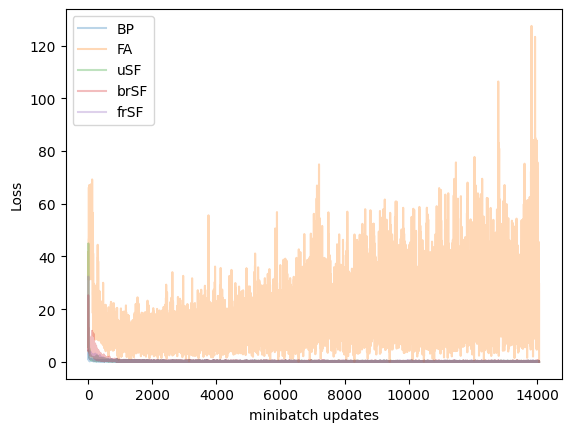

In [21]:
plt.plot(range(len(epoch_loss[0])), epoch_loss[0], label = "BP",alpha = 0.3)
plt.plot(range(len(epoch_loss[1])), epoch_loss[1], label = "FA",alpha = 0.3)
plt.plot(range(len(epoch_loss[2])), epoch_loss[2], label = "uSF",alpha = 0.3)
plt.plot(range(len(epoch_loss[3])), epoch_loss[3], label = "brSF",alpha = 0.3)
plt.plot(range(len(epoch_loss[4])), epoch_loss[4], label = "frSF",alpha = 0.3)
plt.legend(loc = "best")
plt.xlabel("minibatch updates")
plt.ylabel("Loss")
plt.show()

In [23]:
acc = [0, 0,0 ,0,0]
c = 0
for x,y in test_loader:
    c = c+1
    metric = torchmetrics.Accuracy(task = "multiclass", num_classes = 10)
    acc[0] += metric(bp_classifier(x), y)
    acc[1] += metric(fa_classifier(x), y)
    acc[2] += metric(usf_classifier(x), y)
    acc[3] += metric(brsf_classifier(x), y)
    acc[4] += metric(frsf_classifier(x), y)
print("Test Accuracy BackProp: ",acc[0]/c)
print("Test Accuracy Feedback Alignment: ",acc[1]/c)
print("Test Accuracy uSF: ",acc[2]/c)
print("Test Accuracy brSF: ",acc[3]/c)
print("Test Accuracy frSF: ",acc[4]/c)

Test Accuracy BackProp:  tensor(0.9103)
Test Accuracy Feedback Alignment:  tensor(0.8123)
Test Accuracy uSF:  tensor(0.8920)
Test Accuracy brSF:  tensor(0.8952)
Test Accuracy frSF:  tensor(0.8908)


In [22]:
torch.save(bp_classifier.state_dict(), "bp_cnn_classifier_model.pkl")
torch.save(fa_classifier.state_dict(), "fa_cnn_classifier_model.pkl")
torch.save(usf_classifier.state_dict(), "usf_cnn_classifier_model.pkl")
torch.save(brsf_classifier.state_dict(), "brsf_cnn_classifier_model.pkl")
torch.save(frsf_classifier.state_dict(), "frsf_cnn_classifier_model.pkl")